In [89]:
import random

# Импортируем библиотеки
# Пандас для работы с таблицами
import pandas as pd
import sns as sns
import tensorflow as tf
import numpy as np
# Для разделения на обучающие данные и данные на которых будет тестироваться модель
from sklearn.model_selection import train_test_split
# Для замены string на int
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
data = pd.read_csv("data.csv")
#TODO model save

data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [91]:
# Sklearn модель ridge, ssvm https://www.bmc.com/blogs/scikit-learn-classification-tutorial/

In [92]:
# Вывод уникальных значений для каждого столбца
for column in data.columns:
    value = data[column].unique()
    print(f"Уникальные значения столбца {column}: {value}")

Уникальные значения столбца gender: ['Female' 'Male' 'Other']
Уникальные значения столбца age: [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
Уникальные значения столбца hypertension: [0 1]
Уникальные значения столбца heart_disease: [1 0]
Уникальные значения столбца smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Уникальные значения столбца bmi: [25.19 27.32 23.45 ... 59.42 44.39 60.52]
Уникальные значе

In [93]:
# Знайдемо стовпці де є пропущені значення
cols_with_missing_values = data.columns[data.isnull().any()]

# Замінимо пропущені значення в знайдених стовпцях середніми
data[cols_with_missing_values] = data[cols_with_missing_values].apply(lambda col: col.fillna(data[col.name].mean()))

# убрать все строки, содержащие NaN значения
data = data.dropna()

In [94]:
# Находим неверные значения и заменяем их средними
# print(set(data["gender"]))
values = ['Male', 'Female']
data.loc[data["gender"] == "Other", "gender"] = random.choice(values)

# Преобразуем категориальные значения в числа с помощью map

# Для этих задач отлично подходит код ниже, но мы делаем это вручную.
# data["smoking_history"] = LabelEncoder().fit_transform(data["smoking_history"])
# print(data['smoking_history'])

# Дадим значения полам
mapping = {'Female': 0, 'Male': 1}
data['gender'] = data['gender'].map(mapping)

# Определим историю курения
mapping = {'never': 0, 'current': 1, 'No Info': 0, 'former': 0.5, "ever": 0.1, "not current": 0.2}
data['smoking_history'] = data['smoking_history'].map(mapping)

# Изменим ml\ds на mmol\l
data['blood_glucose_level'] = data['blood_glucose_level'] * 0.056

In [95]:
# # Удаляем outliners из столбца
# for column in data.columns:
#     print(column, sep="\n\n\n")
#
#     mean_value = data[column].mean()
#     std_value = data[column].std()
#
#     print(f"Среднее значение: {mean_value}")
#     print(f"Стандартное отклонение: {std_value}")
#
#     lower_limit = mean_value - 3 * std_value
#     upper_limit = mean_value + 3 * std_value
#
#     print(lower_limit)
#     print(upper_limit)
#
#     df_scores_filtered = data[
#         (data[column] > lower_limit) &
#         (data[column] < upper_limit)
#     ]
#
#     print(df_scores_filtered)
#     print(data[column])

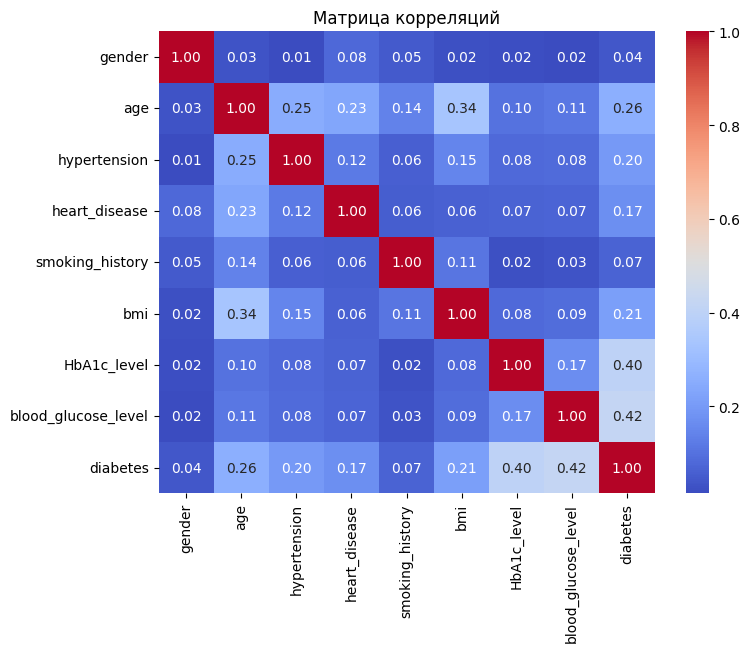

Корреляция между 'blood_glucose_level' и 'diabetes': 0.4195579960205563
Корреляция между 'HbA1c_level' и 'diabetes': 0.4006603146474924
Корреляция между 'age' и 'bmi': 0.3373957761861766
Корреляция между 'age' и 'diabetes': 0.25800803335609984
Корреляция между 'age' и 'hypertension': 0.25117112907443984


In [96]:
correlation_matrix = data.corr().abs()

# Визуализация матрицы корреляций с помощью heatmap из библиотеки Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

# Преобразование матрицы в список значений и их пар признаков
correlation_list = [(correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
                    for i in range(correlation_matrix.shape[0])
                    for j in range(i + 1, correlation_matrix.shape[1])]

# Сортировка списка по убыванию значений корреляции
correlation_list.sort(key=lambda x: x[2], reverse=True)

# Выбор первых пяти неповторяющихся значений корреляции, исключая 1
unique_correlations = []
count = 0
index = 0

while count < 5:
    if correlation_list[index][2] < 1 and correlation_list[index][2] not in unique_correlations:
        unique_correlations.append(correlation_list[index][2])
        print(f"Корреляция между '{correlation_list[index][0]}' и '{correlation_list[index][1]}': "
              f"{correlation_list[index][2]}")
        count += 1
    index += 1

In [97]:
# split into input and output columns
X = data.values[:, :-1]
y = data.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

In [98]:
# split into train and test datasets но мы используем стратификацию. Это говорит о том что данные разделятся с одинаковым соотношением классов.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 8) (20000, 8) (80000,) (20000,)


In [99]:
X_train = pd.DataFrame(X_train)
print("до:\n", X_train.isnull().sum())
# Знайдемо стовпці де є пропущені значення
cols_with_missing_values = X_train.columns[X_train.isnull().any()]

# Замінимо пропущені значення в знайдених стовпцях середніми
X_train[cols_with_missing_values] = X_train[cols_with_missing_values].apply(lambda col: col.fillna(X_train[col.name].mean()))

# убрать все строки, содержащие NaN значения
X_train = X_train.dropna()

# from sklearn.impute import SimpleImputer
#
# # ... (ваш текущий код до обработки NaN значений)
# print(data.isnull().sum())
# # Найти столбцы с пропущенными значениями
# cols_with_missing_values = data.columns[data.isnull().any()]
#
# # Создать импутер для заполнения NaN значений средними значениями
# imputer = SimpleImputer(strategy='mean')
# # Проверьте типы данных выбранных столбцов
# print(data[cols_with_missing_values].dtypes)
# # Применить импутер к столбцам с пропущенными значениями
# data[cols_with_missing_values] = imputer.fit_transform(data[cols_with_missing_values])


print("после:\n", X_train.isnull().sum())

X_test = pd.DataFrame(X_test)
print("до:\n", X_test.isnull().sum())
# Знайдемо стовпці де є пропущені значення
cols_with_missing_values = X_test.columns[X_test.isnull().any()]

# Замінимо пропущені значення в знайдених стовпцях середніми
X_test[cols_with_missing_values] = X_test[cols_with_missing_values].apply(lambda col: col.fillna(X_test[col.name].mean()))

# убрать все строки, содержащие NaN значения
X_test = X_test.dropna()

# from sklearn.impute import SimpleImputer
#
# # ... (ваш текущий код до обработки NaN значений)
# print(data.isnull().sum())
# # Найти столбцы с пропущенными значениями
# cols_with_missing_values = data.columns[data.isnull().any()]
#
# # Создать импутер для заполнения NaN значений средними значениями
# imputer = SimpleImputer(strategy='mean')
# # Проверьте типы данных выбранных столбцов
# print(data[cols_with_missing_values].dtypes)
# # Применить импутер к столбцам с пропущенными значениями
# data[cols_with_missing_values] = imputer.fit_transform(data[cols_with_missing_values])


print("после:\n", X_test.isnull().sum())

до:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64
после:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64
до:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64
после:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [100]:
# Определяем количество фич (Термин "фичи" относится к характеристикам или переменным, используемым для описания каждого образца в наборе данных. Например, если у вас есть данные о покупках, фичами могут быть цена продукта, количество, тип платежа и т. д. ). Столбцов для обучения
n_features = X_train.shape[1]
print(n_features)

8


In [101]:
print(X_test)
print(data.columns)

         0     1    2    3    4          5    6      7
0      0.0  36.0  0.0  0.0  0.5  22.639999  6.0  8.960
1      0.0  31.0  0.0  0.0  0.0  27.320000  5.8  7.056
2      1.0  52.0  0.0  0.0  0.1  23.200001  4.0  5.600
3      0.0  29.0  0.0  0.0  0.0  30.570000  5.0  8.960
4      1.0  61.0  0.0  0.0  0.0  26.879999  5.8  5.040
...    ...   ...  ...  ...  ...        ...  ...    ...
19995  0.0  22.0  0.0  0.0  0.0  20.299999  4.0  4.480
19996  0.0  38.0  0.0  0.0  0.0  23.600000  3.5  7.280
19997  0.0  38.0  0.0  0.0  0.0  26.570000  6.2  8.904
19998  0.0  78.0  0.0  0.0  0.0  27.320000  5.8  4.760
19999  1.0  71.0  0.0  0.0  0.0  29.530001  6.5  8.960

[20000 rows x 8 columns]
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [102]:
# from sklearn.preprocessing import StandardScaler
# import seaborn as sns
# scaler = StandardScaler().fit(X_train)
# x_train = scaler.transform(X_train)
# x_test = scaler.transform(X_test)
#
# from sklearn.svm import SVC
# svc_model = SVC()
#
# svc_model.fit(x_train, y_train)
#
# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
# decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
# kernel='rbf', max_iter=-1, probability=False, random_state=None,
# shrinking=True, tol=0.001, verbose=False)
#
# y_predict = svc_model.predict(x_test)
#
# # aaa = pd.DataFrame(["1", "19", "0", "0", "0", "20", "5", "120"])
# # x_qwer = svc_model.predict([1, aaa])
#
# from sklearn.metrics import classification_report, confusion_matrix
# cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
# confusion = pd.DataFrame(cm, index=['Diabetic', 'Not Diabetic'], columns=['Predicted Diabetes', 'Predicted Healthy'])
# sns.heatmap(confusion,annot=True,fmt='g')
# print(classification_report(y_test, y_predict))

In [103]:
# Определяем что наша модель последовательная. Т.е. мы добавляем слои один за другим.
model = Sequential()

In [104]:
# Создаем 3 слоя на 10, 8 и 1 нейрон.
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [105]:
# # Определение функции потерь и оптимизатора
# # loss_function = tf.keras.losses.BinaryCrossentropy()
# # optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Используем Adam оптимизатор
# #
# # # Компиляция модели с функцией потерь и оптимизатором
# # model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
# #
# # # Обучение модели на данных
# # model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_train, y_train))

In [106]:

# Выбираем оптимизатор для минимизации функции потерь, определяем функцию потерь, и ставим флажок на то что хотим видеть точность модели.
# Оптимизатор в контексте обучения нейронных сетей в машинном обучении представляет собой алгоритм, который определяет способ обновления весов (параметров) модели с целью минимизации функции потерь.
# Функция потерь представляет собой математическую функцию, которая измеряет разницу между прогнозируемыми значениями модели и фактическими целевыми значениями.
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])


In [107]:
# Берем тренировочные данные. Устанавливаем количество эпох, вводим размер батча и устанавливаем правило вывода. verbose=1 выводить данные по каждой эпохе, =0 не выводить.
model.fit(X_train, y_train, epochs=4, batch_size=10, verbose=1)

Epoch 1/4
8000/8000 [==============================] - 10s 1ms/step - loss: 0.2731 - accuracy: 0.9204
Epoch 2/4
8000/8000 [==============================] - 9s 1ms/step - loss: 0.1742 - accuracy: 0.9417
Epoch 3/4
8000/8000 [==============================] - 9s 1ms/step - loss: 0.1366 - accuracy: 0.9543
Epoch 4/4
8000/8000 [==============================] - 9s 1ms/step - loss: 0.1252 - accuracy: 0.9578


In [108]:
# Высчитываем точность модели, сравнивая
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {acc * 100}')

625/625 [==============================] - 1s 1ms/step - loss: 0.1705 - accuracy: 0.9301
Test Accuracy: 93.01499724388123


In [109]:
# data_shape = data.shape[0]
# print(data_shape)
# start_weights = tf.random.uniform(shape=[16, 8], maxval=0, minval=1)
# start_weights

In [110]:
# make a prediction
# row = [1,0.2,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
print(X_train)
yhat = model.predict(X_train)
for idx, prediction in enumerate(yhat):
    print(f'Prediction {idx + 1}: {prediction * 100}%')

         0     1    2    3    4          5    6       7
0      0.0  80.0  1.0  0.0  0.5  27.320000  6.5   8.120
1      0.0  19.0  0.0  0.0  0.0  25.180000  4.5   7.056
2      0.0  36.0  0.0  0.0  0.0  25.950001  6.6  11.200
3      0.0  35.0  0.0  0.0  1.0  23.430000  6.0   8.904
4      0.0  30.0  0.0  0.0  0.0  22.620001  5.0   5.040
...    ...   ...  ...  ...  ...        ...  ...     ...
79995  0.0  39.0  0.0  0.0  0.0  32.279999  4.8   7.280
79996  1.0  43.0  0.0  0.0  0.0  27.320000  6.2   8.848
79997  0.0  52.0  1.0  0.0  0.5  27.320000  5.8   8.680
79998  0.0   5.0  0.0  0.0  0.0  15.680000  6.2   8.680
79999  1.0   4.0  0.0  0.0  0.0  27.320000  4.0   7.280

[80000 rows x 8 columns]
2500/2500 [==============================] - 2s 895us/step
Prediction 1: [72.97389]%
Prediction 2: [0.09284503]%
Prediction 3: [32.90966]%
Prediction 4: [6.621279]%
Prediction 5: [0.20014255]%
Prediction 6: [0.08499411]%
Prediction 7: [1.2499284]%
Prediction 8: [0.35775515]%
Prediction 9: [1.1609339]%

In [124]:

new_data = ["1", #Введите пол Female or Male \ 0 or 1
            "19", #Введите возраст 10.0
            "0", #'hypertension'0 or 1,
            "0", #'heart_disease'0 or 1,
            "0", #'smoking_history' never, ever, current, not current
            "22.92", #'bmi'10.0,
            "5.5", #'HbA1c_level'10.0,
            "12.5" ] #'blood_glucose_level' mmol 6.2 or md\dl

# data_process(new_data)

# строки в числа с плавающей запятой
new_data_numeric = np.array(new_data, dtype=float)

#
new_data_numeric = new_data_numeric.reshape(1, -1)  # Изменяем форму на (1, num_features)

#
prediction = model.predict(new_data_numeric)

#
print("Предсказанная вероятность:", prediction * 100)

# Определите классификацию на основе порога
if 0.5 <= prediction <= 0.6:
    print("Человек вероятно заболеет диабетом, в течении 5-10 лет")
elif 0.61 <= prediction <= 0.8:
    print("Человек вероятно заболеет диабетом, в течении 1-3 лет")
elif 0.81 <= prediction <= 1:
    print("Человек вероятно заболеет диабетом, в течении года.")
    if 0.9 <= prediction <= 1:
        print("Срочно обратитесь к эндокринологу!")
elif 0.3 <= prediction <= 0.49:
    print("Человек находится в зоне риска, и имеет предрасположенность к развитию заболевания. Или проблем с эндокринной системой.")
elif 0.2 <= prediction <= 0.29:
    print("Человек не находится в зоне риска, но при этом имеет невыраженные проблемы со здоровьем которые могут развиваться.")
else:
    print("Человек не имеет предпосылок к диабету")

1/1 [==============================] - 0s 22ms/step
Предсказанная вероятность: [[40.639366]]
Человек находится в зоне риска, и имеет предрасположенность к развитию заболевания. Или проблем с эндокринной системой.
